In [1]:
%run 'pymol_and_pdb_functions.py'
import itertools
notebook_prefix = 'ks16'

%run 'ks01_Functions_only.ipynb'

/home/alm/anaconda2/envs/mr_propper/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


KeyError: 'Percent buried residues'

In [2]:
rosetta_folder = os.path.join(analysis_folder, 'Sasha', 'rosetta_runs', '')
predicted_ddG = pd.read_table(rosetta_folder + 'run-170503-results.csv')
predicted_ddG['mut_number'] = predicted_ddG['mut_list_Scer'].apply(lambda s: s.count(':')+1)
WT_score = np.mean([-562.382, -562.380, -562.375])
predicted_ddG['ddG'] = predicted_ddG.apply(lambda x: np.mean([x['ddg_score1'],x['ddg_score2'],x['ddg_score3']]) - WT_score,axis=1)

potential_dict = {}
for i in range(1,13):
    potential_dict['S%s_scaled' %i] =  pd.read_csv('../Katya/NN/residuals/S%s.csv' %i)
potential_with_segments_column = []
for segment_,data_ in potential_dict.items():
    print segment_
    data_copy = data_.copy()
    data_copy['segment'] = segment_
    potential_with_segments_column.append(data_copy)
potential_concat = pd.concat(potential_with_segments_column,axis=0)
potential_and_ddG = pd.merge(predicted_ddG,potential_concat,on='aa_seq')

S9_scaled
S5_scaled
S6_scaled
S1_scaled
S2_scaled
S10_scaled
S7_scaled
S8_scaled
S12_scaled
S3_scaled
S4_scaled
S11_scaled


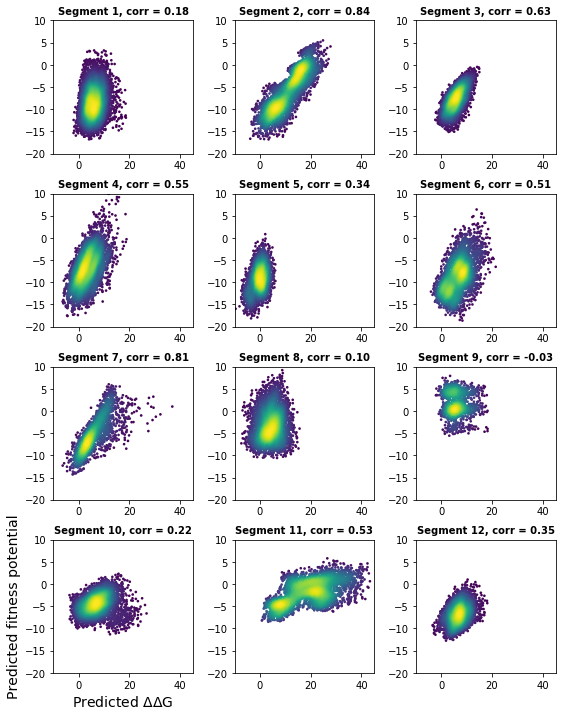

In [34]:
from scipy.stats import gaussian_kde

def density_scatter(x,y,ax,s=7):
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    ax.scatter(x, y, c=z, s=s, edgecolor='')

plt.close('all')
# axes = plt.subplots(nrows=2,ncols=6)
fig = plt.figure(figsize=(9,12))
for i in range(1,13):

    d = potential_and_ddG[potential_and_ddG['segment_x']=='S%s_scaled'%i]
#     plt.scatter(potential_and_ddG['ddG'],potential_and_ddG['fitnessPotential'])
    ax = fig.add_subplot(4,3,i)
#     np.hist2d(d.ddG.values,d.fitnessPotential.values,bins=50,range=[[-10,45],[-30,16]]);
    density_scatter(d.ddG.values,d.fitnessPotential.values,ax)
    ax.set_xlim([-10,45])
    ax.set_ylim([-20,10])
    if i == 10:
        plt.xlabel(r"Predicted $\Delta\Delta$G",size=14)
        plt.ylabel('Predicted fitness potential',size=14)
#     if i in [1,2,3,4,5,6,7,8,]:
#         ax.set_xticks([])
#     if i in [2,3,4,6,7,8,10,11,12]:
#         ax.set_yticks([])
#     plt.text(13,-27,"S%s\nSC = %.2f" % (i, stats.spearmanr(d.ddG.values,d.fitnessPotential.values).correlation),color='black',size=16 )
    ax.set_title("Segment %s, corr = %.2f" % (i, stats.spearmanr(d.ddG.values,d.fitnessPotential.values).correlation),size=10,fontweight='bold')
plt.subplots_adjust(hspace =.3)
plt.subplots_adjust(wspace =.3)
plt.savefig("../Sasha/S7-fitnessPotential.png",bbox_inches='tight',dpi=300)


In [7]:
%run ks01_Data_import.ipynb

11510
259


/home/alm/anaconda2/envs/mr_propper/lib/python2.7/site-packages/ipykernel/__main__.py:15: FutureWarning: the raise_on_error=False keyword is deprecated, use errors='ignore' instead


In [11]:
s_with_segments_column = []
for segment_,data_ in data.items():
    print segment_
    data_copy = data_.copy()
    data_copy['segment'] = segment_
    s_with_segments_column.append(data_copy.loc[:,['segment','aa_seq','s']])
s_concat = pd.concat(s_with_segments_column,axis=0)
s_and_ddG = pd.merge(predicted_ddG,s_concat,on='aa_seq')

S1_scaled
S2_scaled
S3_scaled
S4_scaled
S5_scaled
S6_scaled
S7_scaled
S8_scaled
S9_scaled
S10_scaled
S11_scaled
S12_scaled


In [32]:
WT_score

-562.37900000000002

In [40]:
s_and_ddG.columns

Index([u'aa_seq', u'mut_list_Scer', u'ddg_score1', u'ddg_score2',
       u'ddg_score3', u'segment_x', u'mut_number', u'ddG', u'segment_y', u's'],
      dtype='object')

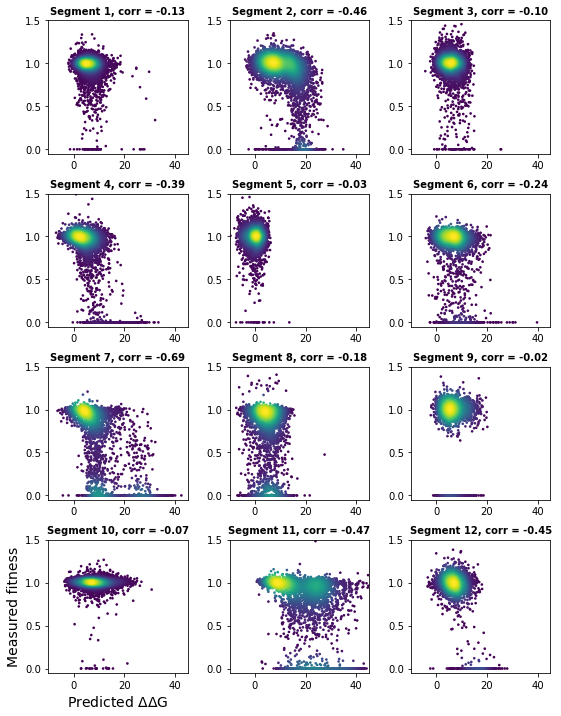

In [36]:
plt.close('all')

fig = plt.figure(figsize=(9,12))
for i in range(1,13):

    d = s_and_ddG[s_and_ddG['segment_x']=='S%s_scaled'%i]
    ax = fig.add_subplot(4,3,i)

    density_scatter(d.ddG.values,d.s.values,ax)
    if i == 10:
        plt.xlabel(r"Predicted $\Delta\Delta$G",size=14)
        plt.ylabel('Measured fitness',size=14)
    ax.set_title("Segment %s, corr = %.2f" % (i, stats.spearmanr(d.ddG.values,d.s.values).correlation),size=10,fontweight='bold')
    ax.set_xlim([-10,45])
    ax.set_ylim([-0.05,1.5])
plt.subplots_adjust(hspace =.3)
plt.subplots_adjust(wspace =.3)
plt.savefig("../Sasha/S7-fitness.png",bbox_inches='tight',dpi=300)

In [37]:
fp_s_ddG = pd.merge(s_and_ddG,potential_and_ddG,on='aa_seq')

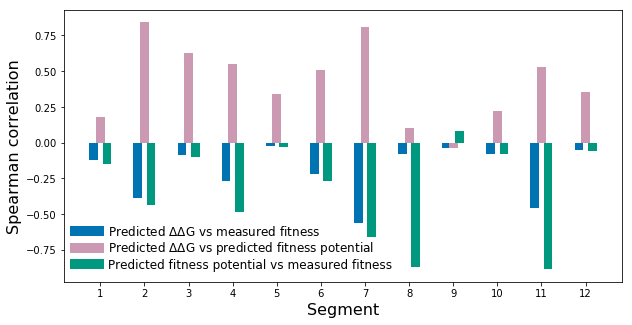

In [72]:
def set_legend_linewidth(legend_object,lw=3.0):
    for legobj in legend_object.legendHandles:
        legobj.set_linewidth(lw)

plt.close('all')

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
for i in range(1,13):

    d = fp_s_ddG[fp_s_ddG['segment_x_x']=='S%s_scaled'%i]
    ax.bar(i-0.15,stats.spearmanr(d.ddG_x.values,d.s.values).correlation,color=[0.,.45,.7],width=.2)
    ax.bar(i,stats.spearmanr(d.ddG_x.values,d.fitnessPotential.values).correlation,color=[.8,.6,.7],width=.2)
    ax.bar(i+0.15,stats.spearmanr(d.fitnessPotential.values,d.s.values).correlation,color=[0.,.6,.5],width=.2)
#     ax = fig.add_subplot(4,3,i)

#     density_scatter(d.ddG.values,d.s.values,ax)
#     if i == 10:
#         plt.xlabel(r"Predicted $\Delta\Delta$G",size=14)
#         plt.ylabel('Measured fitness',size=14)
#     ax.set_title("Segment %s, corr = %.2f" % (i, stats.spearmanr(d.ddG.values,d.s.values).correlation),size=10,fontweight='bold')
#     ax.set_xlim([-10,45])
#     ax.set_ylim([-0.05,1.5])
plt.plot([np.nan],color=[0.,.45,.7],label=r'Predicted $\Delta\Delta$G vs measured fitness')
plt.plot([np.nan],color=[.8,.6,.7],label=r'Predicted $\Delta\Delta$G vs predicted fitness potential')
plt.plot([np.nan],color=[0.,.6,.5],label=r'Predicted fitness potential vs measured fitness')
# plt.subplots_adjust(hspace =.3)
# plt.subplots_adjust(wspace =.3)
leg=plt.legend(frameon=False,fontsize=12,labelspacing=.1)
set_legend_linewidth(leg,10)
plt.xlabel("Segment",size=16)
plt.ylabel("Spearman correlation",size=16)
plt.xticks(range(1,13))
plt.savefig("../Sasha/S7-all-cor.png",bbox_inches='tight',dpi=300)

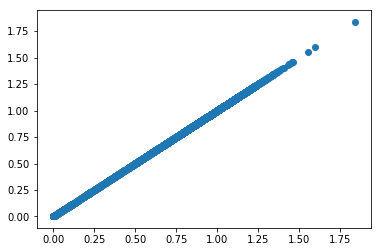

In [39]:
#fp_s_ddG.iloc[:,['aa_seq','mut_list_Scer_x','segment_x_x','ddG_x','fitnessPotential']
#plt.scatter(fp_s_ddG.observed.values,fp_s_ddG.s.values)